<center><h3>
UNIVERSIDADE FEDERAL DO PARANÁ<br>
SETOR DE EDUCAÇÃO PROFISSIONAL E TECNOLÓGICA
</center><br><br><br>

<center><H3>LUCAS MARTINS SORRENTINO</center><br><br><br>

<center><b><h3>DADOS E RACISMO ESTRUTURAL NO SUS EM CURITIBA</b></center><br><br><br>

 <p align="right">Trabalho apresentado à disciplina 'Visualização<br> de Dados e Storytelling', ministrada pela profa.<br> Dra. Isabela Mantovani Fontana ao Curso de<br>Pós-graduação de Inteligência Artificial Aplicada,<br>Turma 2025.</p><br><br><br>

<CENTER> CURITIBA<br>2025</CENTER><br><br><br>

Este trabalho foi inspirado pela tese de doutorado do sociógolo André Marega Pinhel (https://www.teses.usp.br/teses/disponiveis/8/8132/tde-31102024-135539/publico/2024_AndreMaregaPinhel_VCor.pdf), e tem como público alvo a população média da cidade de Curitiba.<br>
<br><br>
<h4>História:</h4>
<p>O Sistema Único de Saúde, o SUS, nasceu de um princípio fundamental: a saúde é um direito de todos e um dever do Estado. Uma promessa de acesso universal, integral e, acima de tudo, igualitário.
Por trás de cada atendimento realizado no SUS, existe uma pessoa. Um cidadão com uma história, uma família, e uma necessidade de cuidado. E quando somamos milhões desses atendimentos, eles se transformam em dados, em estatísticas.</p>

<p>O que esses números nos contam? A história que emerge deles é uma só para todos os brasileiros?</p>

<p>Nesta apresentação, vamos sair do campo das impressões e mergulhar na frieza dos números. Os gráficos que vocês verão a seguir não contêm opiniões, mas sim evidências. Eles são um retrato estatístico de como a desigualdade racial se manifesta no acesso e na qualidade do atendimento em saúde no Brasil. Tenatrei usar os dados para tornar visível um problema estrutural necessário para discutir caminhos de um SUS verdadeiramente para todos.</p>
<p>Neste trabalho eu vou usar a base de dados de Autorização para Internação Hospitalar (AIH), que é a base do Sistema de Informações Hospitalares (SIH/SUS). Este sistema registra dados detalhados sobre as internações, em todo o Brasil, porém eu vou trabalhar exclusivamente com os dados das instituições de saúde da capital paranaense. Nesta base de dados cada registro corresponde a uma AIH, que é um documento obrigatório para autorizar e registrar uma internação hospitalar pelo sistema público.</p>
<p>Entre as informações presentes na base estão: dados do paciente (idade, sexo, raça/cor, município de residência), dados do atendimento (tipo de internação, motivo, procedimentos realizados, data de entrada e alta), diagnóstico, características do hospital e informações administrativas (valores pagos, códigos de procedimentos e profissionais envolvidos).

A base AIH/SIH/SUS é fundamental para monitorar o perfil das internações, planejar políticas de saúde, acompanhar a alocação de recursos e identificar desigualdades no acesso e na qualidade dos atendimentos hospitalares, incluindo recortes por raça/cor, região, faixa etária e outros fatores.</p>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

caminho_do_arquivo = 'limpando17.07.25.csv'

    # 1. Carrega os dados originais do arquivo CSV para um DataFrame.
df_original = pd.read_csv(caminho_do_arquivo)
print(f"Arquivo '{caminho_do_arquivo}' carregado com sucesso.")
print(f"O DataFrame original tem {len(df_original)} linhas.")

    # 2. Cria uma cópia explícita do DataFrame para manipulação.
    # Todas as modificações serão feitas nesta cópia.
df = df_original.copy()
print("Cópia do DataFrame criada para processamento.")


Arquivo 'limpando17.07.25.csv' carregado com sucesso.
O DataFrame original tem 4476243 linhas.
Cópia do DataFrame criada para processamento.


O gráfico abaixo é um simples cruzamento de dados sobre os atendimentos de internação hospitalar com base na raça. Repare que o "sem informação" é quando a raça não é informada.


Gerando o gráfico com limites de eixo ajustados...

Gráfico salvo com sucesso como 'proporcao_raca_ate_2021_corrigido.png'!


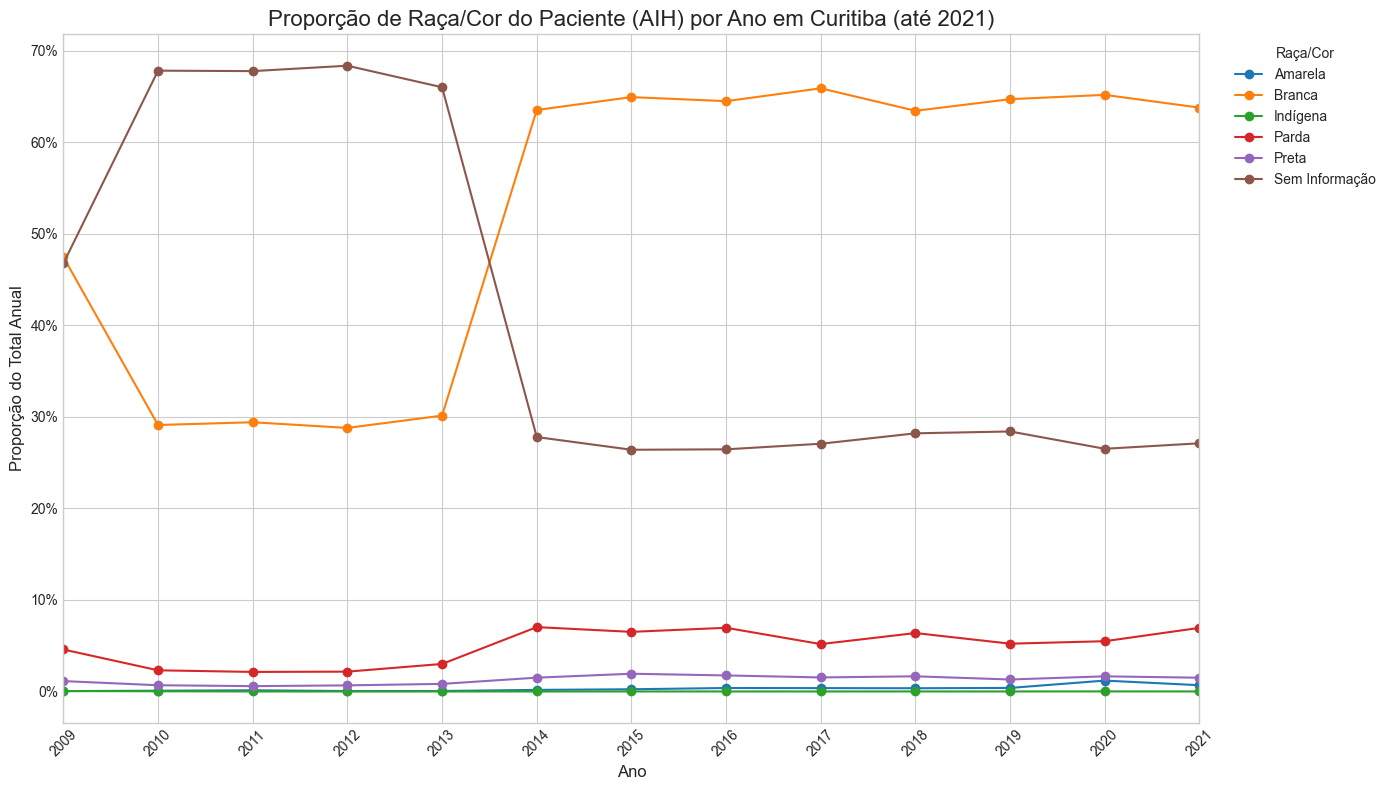

In [3]:
    # --- PREPARAÇÃO DOS DADOS ---
df_filtrado = df.dropna(subset=['ano', 'raca_cor_paciente'])
    # 1. Cria uma tabela de contagem com anos nas linhas e raça/cor nas colunas
    # Garante que 'ano' seja do tipo inteiro
df_filtrado['ano'] = df_filtrado['ano'].astype(int)
    
# Filtra o DataFrame para incluir dados apenas até o ano de 2021
df_filtrado21 = df_filtrado[df_filtrado['ano'] <= 2021]

    # 1. Cria a tabela de contagem
contagens = pd.crosstab(df_filtrado21['ano'], df_filtrado21['raca_cor_paciente'])

    # 2. Calcula as proporções
proporcoes = contagens.div(contagens.sum(axis=1), axis=0)
proporcoes.sort_index(inplace=True) # Garante a ordem dos anos

    # --- GERAÇÃO DO GRÁFICO ---
print("\nGerando o gráfico com limites de eixo ajustados...")

plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(14, 8))

proporcoes.plot(kind='line', marker='o', ax=ax)

    # --- FORMATAÇÃO E SOLUÇÃO DO PROBLEMA ---
    
    # Define o título e os rótulos
ax.set_title('Proporção de Raça/Cor do Paciente (AIH) por Ano em Curitiba (até 2021)', fontsize=16)
ax.set_xlabel('Ano', fontsize=12)
ax.set_ylabel('Proporção do Total Anual', fontsize=12)
ax.yaxis.set_major_formatter(mticker.PercentFormatter(xmax=1.0))

    # Garante que todos os anos sejam exibidos como ticks
ax.set_xticks(proporcoes.index)
plt.xticks(rotation=45)
    
    # (A SOLUÇÃO) Define o limite do eixo X para começar e terminar exatamente com os dados
ano_inicio = proporcoes.index.min()
ano_fim = proporcoes.index.max()
ax.set_xlim(ano_inicio, ano_fim)

    # Move a legenda para fora do gráfico
ax.legend(title='Raça/Cor', bbox_to_anchor=(1.02, 1), loc='upper left')
    
plt.tight_layout()

    # Salva o gráfico
caminho_saida_grafico = 'proporcao_raca_ate_2021_corrigido.png'
plt.savefig(caminho_saida_grafico)

print(f"\nGráfico salvo com sucesso como '{caminho_saida_grafico}'!")

O conceito para explicar a ausênica desses dados sobre raça é "subnotificação", ela por sí já é uma evidência histórica sobre o racismo no Brasil. Os problemas raciais no Brasil foram sistematicamente ocultados em nossa história em favor de um mito de democracia racial, o que reforçou a dimensão estrutural do racismo. <br><br>
Em outubro de 2022 o campo 'raça' passou a ser de preenchimento obrigatório no sistema das AIHs, verifiquem o mesmo padrão gráfico incluindo os anos de 22 à 24.


--- Proporção de cada Raça/Cor por Ano (incluindo 'Ignorado') ---
raca_cor_paciente  Amarela  Branca  Indígena  Parda  Preta  Sem Informação
ano                                                                       
2009                  0.04   47.44      0.05   4.59   1.13           46.75
2010                  0.08   29.10      0.02   2.31   0.68           67.80
2011                  0.13   29.40      0.00   2.13   0.58           67.75
2012                  0.05   28.78      0.00   2.17   0.67           68.34
2013                  0.05   30.13      0.00   3.01   0.83           65.99
2014                  0.17   63.50      0.00   7.03   1.51           27.79
2015                  0.24   64.91      0.00   6.51   1.94           26.40
2016                  0.38   64.47      0.00   6.96   1.75           26.44
2017                  0.37   65.87      0.00   5.17   1.53           27.05
2018                  0.35   63.42      0.00   6.38   1.66           28.19
2019                  0.39   64.6

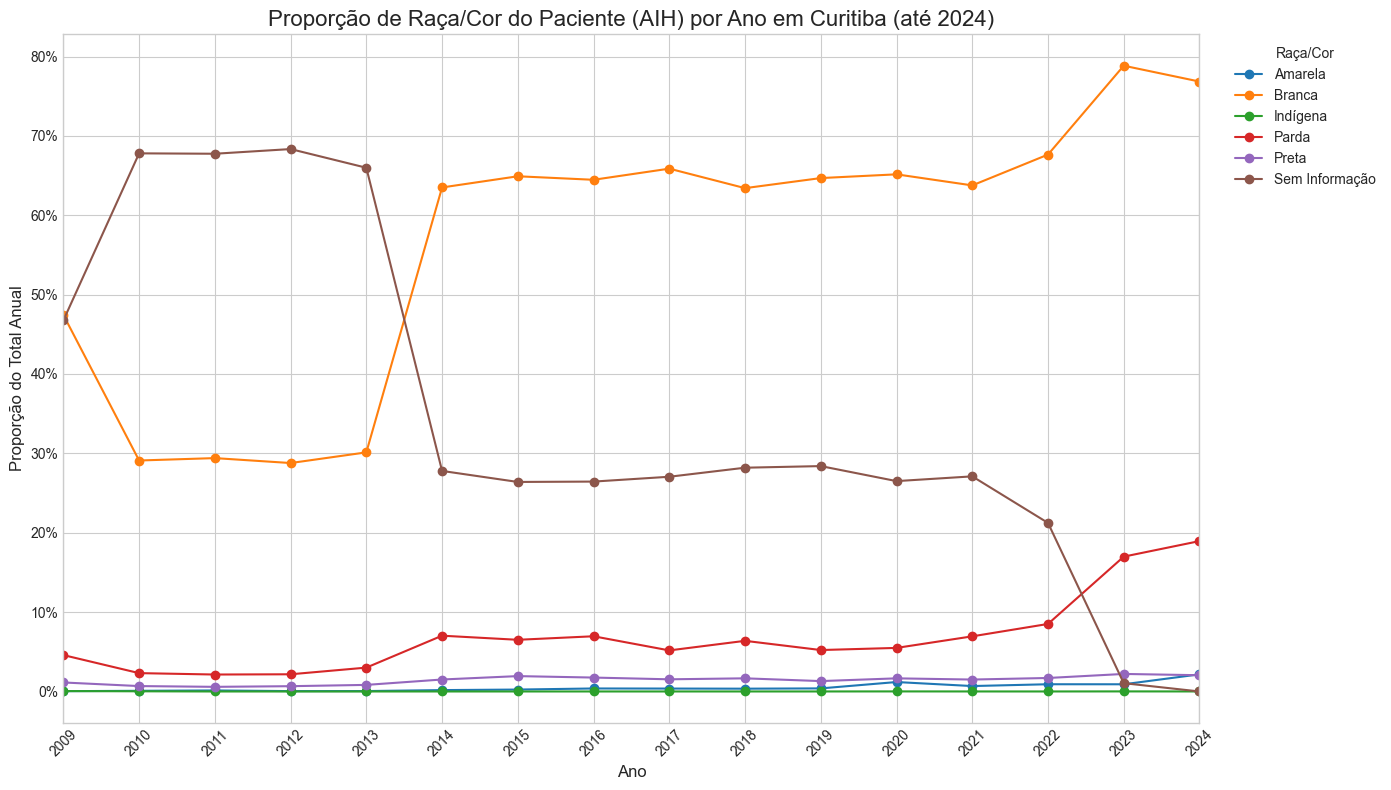

In [ ]:
    # --- PREPARAÇÃO DOS DADOS ---
df_filtrado = df.dropna(subset=['ano', 'raca_cor_paciente'])
    # 1. Cria uma tabela de contagem com anos nas linhas e raça/cor nas colunas
contagens = pd.crosstab(df_filtrado['ano'], df['raca_cor_paciente'])

    # 2. Divide cada linha pela soma da linha para obter a proporção
proporcoes = contagens.div(contagens.sum(axis=1), axis=0)

print("\n--- Proporção de cada Raça/Cor por Ano (incluindo 'Ignorado') ---")
print((proporcoes * 100).round(2))

    # --- GERAÇÃO DO GRÁFICO ---
print("\nGerando o gráfico de série temporal...")

plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(14, 8))

    # Plota automaticamente cada coluna (cada raça/cor) como uma linha separada
proporcoes.plot(kind='line', marker='o', ax=ax)

    # Formatação do gráfico

     # Define o título e os rótulos
ax.set_title('Proporção de Raça/Cor do Paciente (AIH) por Ano em Curitiba (até 2024)', fontsize=16)
ax.set_xlabel('Ano', fontsize=12)
ax.set_ylabel('Proporção do Total Anual', fontsize=12)
ax.yaxis.set_major_formatter(mticker.PercentFormatter(xmax=1.0))

    # Garante que todos os anos sejam exibidos como ticks
ax.set_xticks(proporcoes.index)
plt.xticks(rotation=45)
    
    # (A SOLUÇÃO) Define o limite do eixo X para começar e terminar exatamente com os dados
ano_inicio = proporcoes.index.min()
ano_fim = proporcoes.index.max()
ax.set_xlim(ano_inicio, ano_fim)

    # Move a legenda para fora do gráfico
ax.legend(title='Raça/Cor', bbox_to_anchor=(1.02, 1), loc='upper left')
    
plt.tight_layout()

    # Salva o gráfico
caminho_saida_grafico = 'proporcao_raca_ate_2024_corrigido.png'
plt.savefig(caminho_saida_grafico)

print(f"\nGráfico salvo com sucesso como '{caminho_saida_grafico}'!")

Há uma mudança perceptível na relação dos dados, há um aumento significativo da popopulação branca e parda, o que poderia fazer crer que a subnotificação seria indiscriminada entre essas duas variáveis. <br>

No gráfico abaixo a série temporal excluindo os dados "Sem Informação". 


--- Proporção de cada Raça/Cor por Ano (incluindo 'Ignorado') ---
raca_cor_paciente  Amarela  Branca  Indígena  Parda  Preta
ano                                                       
2009                  0.07   89.09      0.09   8.61   2.13
2010                  0.26   90.38      0.07   7.18   2.11
2011                  0.40   91.17      0.00   6.62   1.81
2012                  0.15   90.91      0.00   6.84   2.10
2013                  0.15   88.57      0.00   8.84   2.44
2014                  0.24   87.94      0.00   9.73   2.09
2015                  0.33   88.19      0.00   8.85   2.63
2016                  0.51   87.65      0.00   9.46   2.38
2017                  0.50   90.30      0.00   7.09   2.10
2018                  0.49   88.31      0.00   8.89   2.31
2019                  0.54   90.34      0.00   7.29   1.83
2020                  1.62   88.65      0.01   7.47   2.25
2021                  0.94   87.47      0.00   9.53   2.06
2022                  1.16   85.88      0.00  10

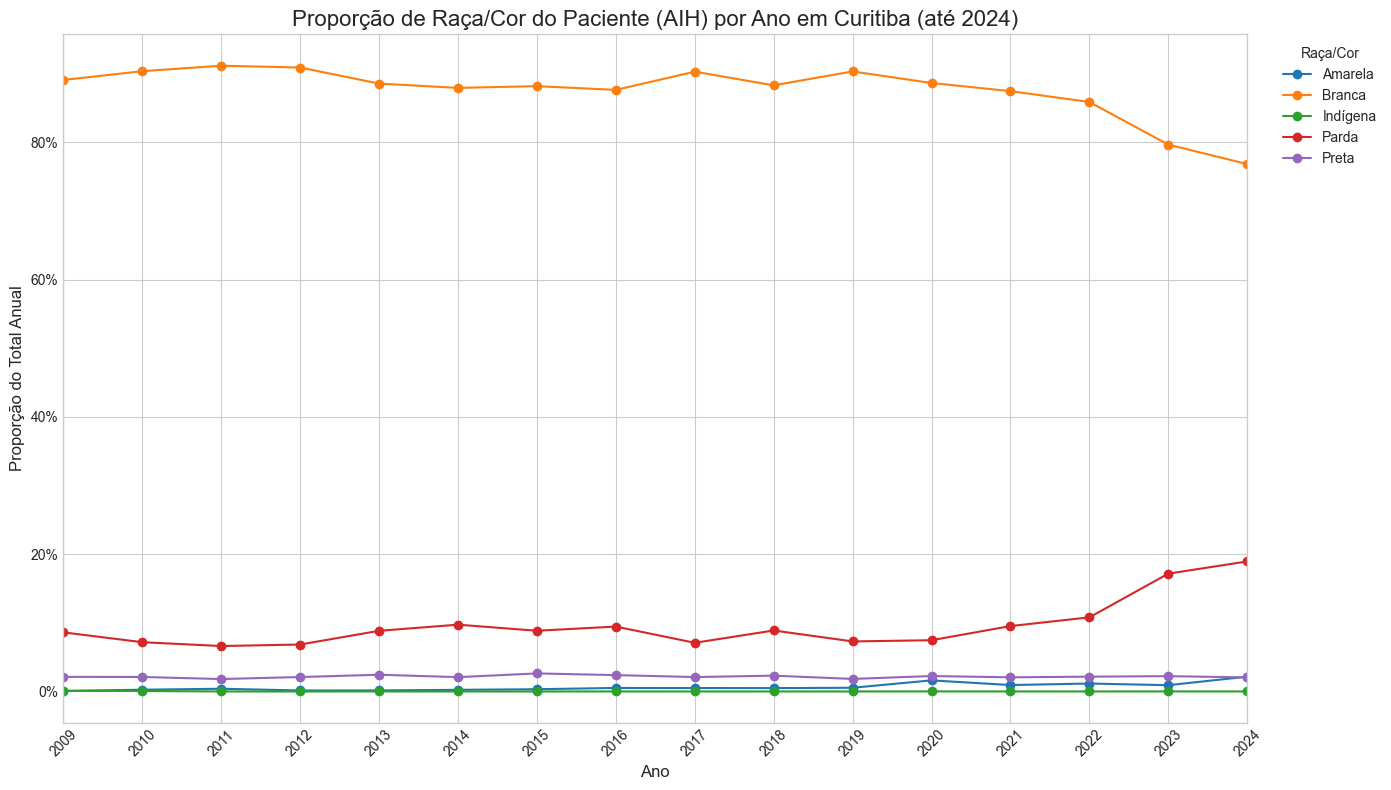

In [5]:
df_filtrado = df_filtrado[df_filtrado['raca_cor_paciente'] != 'Sem Informação']

    # 1. Cria uma tabela de contagem com anos nas linhas e raça/cor nas colunas
contagens = pd.crosstab(df_filtrado['ano'], df['raca_cor_paciente'])

    # 2. Divide cada linha pela soma da linha para obter a proporção
proporcoes = contagens.div(contagens.sum(axis=1), axis=0)

print("\n--- Proporção de cada Raça/Cor por Ano (incluindo 'Ignorado') ---")
print((proporcoes * 100).round(2))

    # --- GERAÇÃO DO GRÁFICO ---
print("\nGerando o gráfico de série temporal...")

plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(14, 8))

    # Plota automaticamente cada coluna (cada raça/cor) como uma linha separada
proporcoes.plot(kind='line', marker='o', ax=ax)

    # Formatação do gráfico

     # Define o título e os rótulos
ax.set_title('Proporção de Raça/Cor do Paciente (AIH) por Ano em Curitiba (até 2024)', fontsize=16)
ax.set_xlabel('Ano', fontsize=12)
ax.set_ylabel('Proporção do Total Anual', fontsize=12)
ax.yaxis.set_major_formatter(mticker.PercentFormatter(xmax=1.0))

    # Garante que todos os anos sejam exibidos como ticks
ax.set_xticks(proporcoes.index)
plt.xticks(rotation=45)
    
    # (A SOLUÇÃO) Define o limite do eixo X para começar e terminar exatamente com os dados
ano_inicio = proporcoes.index.min()
ano_fim = proporcoes.index.max()
ax.set_xlim(ano_inicio, ano_fim)

    # Move a legenda para fora do gráfico
ax.legend(title='Raça/Cor', bbox_to_anchor=(1.02, 1), loc='upper left')
    
plt.tight_layout()

    # Salva o gráfico
caminho_saida_grafico = 'proporcao_raca_ate_2024_corrigido.png'
plt.savefig(caminho_saida_grafico)

print(f"\nGráfico salvo com sucesso como '{caminho_saida_grafico}'!")

Percebam que, a despeito dos números absolutos, a proporação racial, entre pretos/pardos e brancos, passa a se aproximar aos dados do censo de 2022 do IBGE, que é de 24% da população preta/parda em Curitiba. Ou seja, fica visualmente notável que a subnotificação não era indiscriminada.

Dados preparados: 2622591 registros para análise


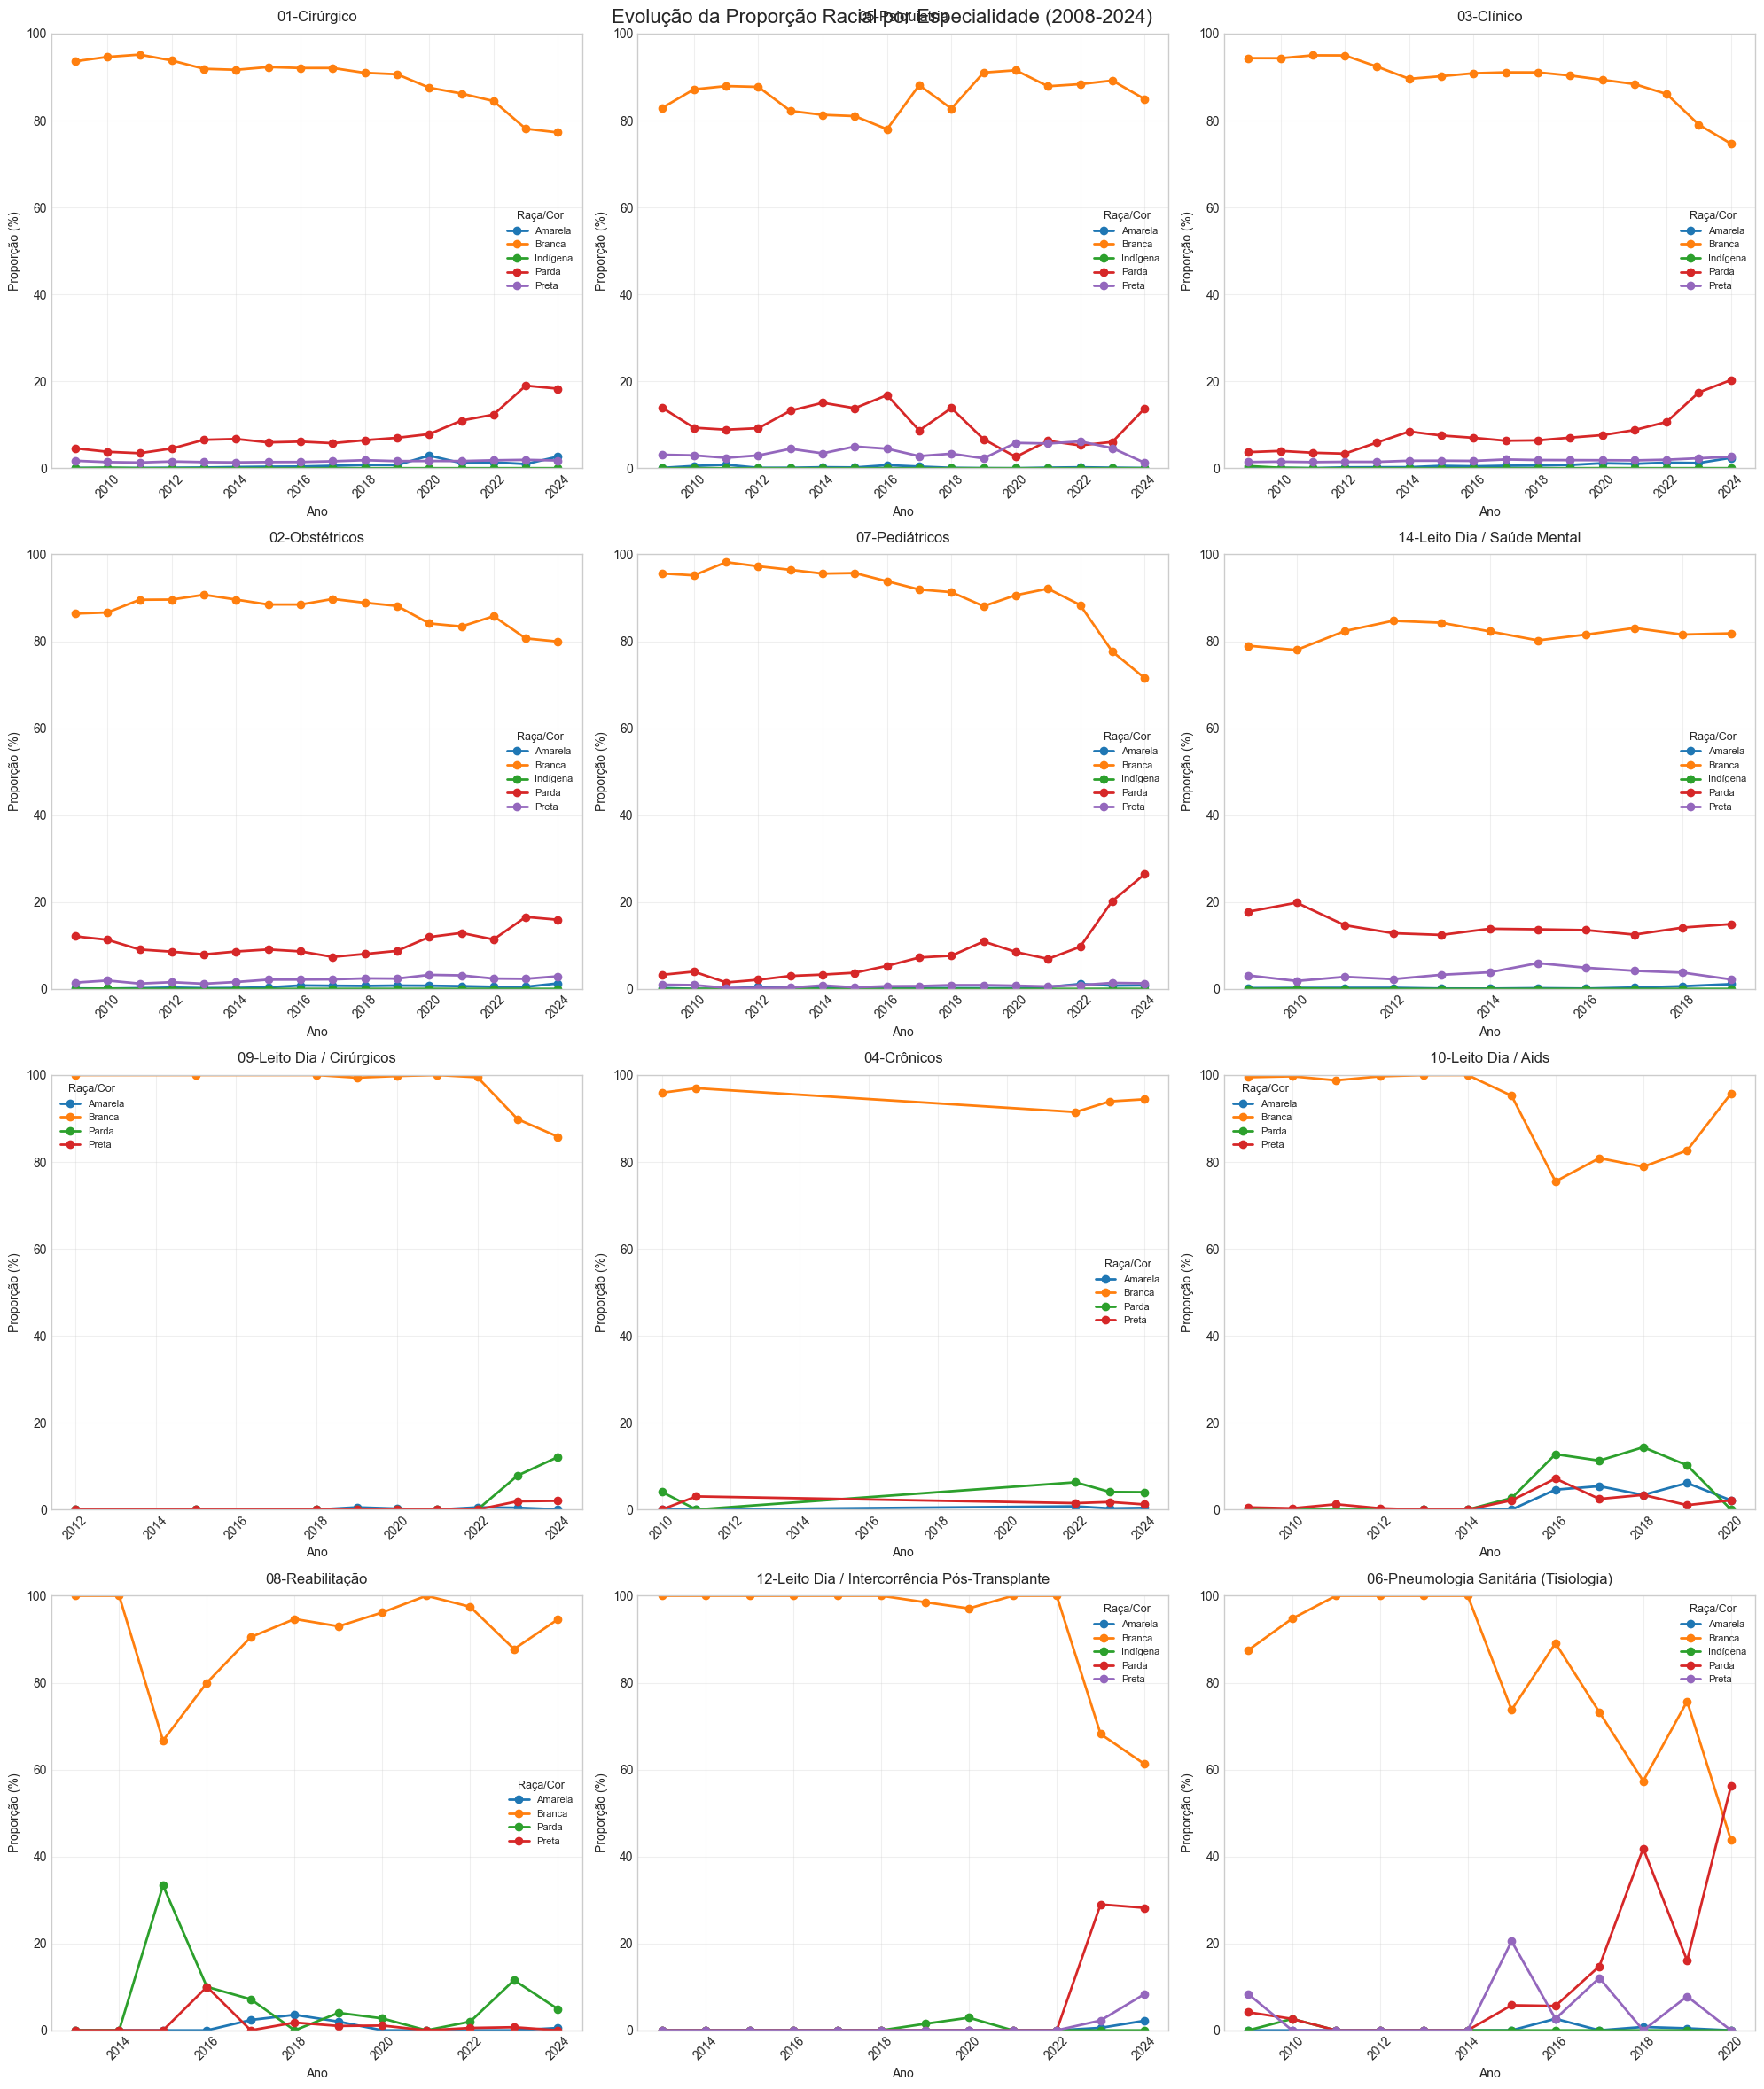

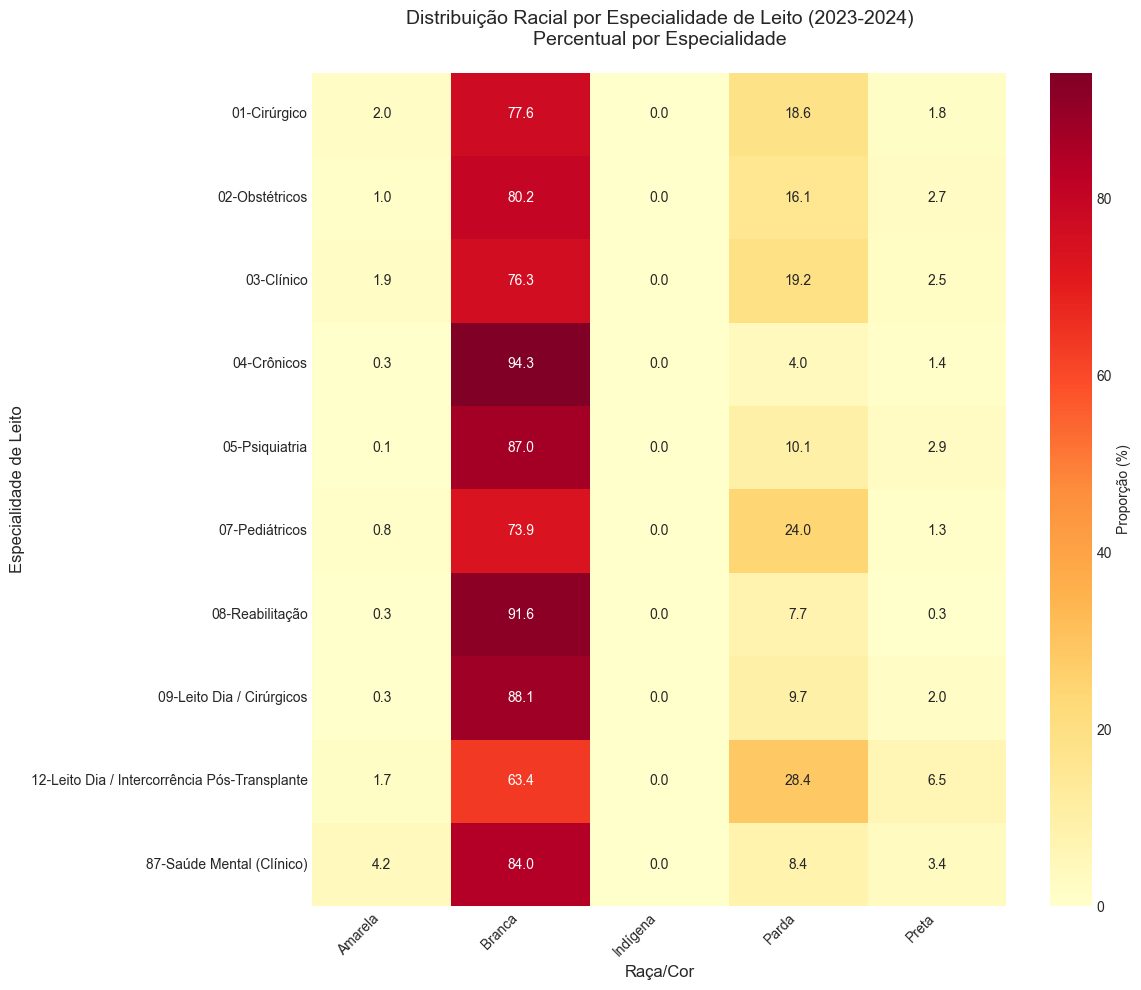


--- Top 10 Especialidades por Volume (2023-2024) ---
01-Cirúrgico: 254089 internações
03-Clínico: 169777 internações
07-Pediátricos: 43156 internações
05-Psiquiatria: 37254 internações
02-Obstétricos: 30064 internações
04-Crônicos: 5536 internações
09-Leito Dia / Cirúrgicos: 3837 internações
87-Saúde Mental (Clínico): 1017 internações
08-Reabilitação: 970 internações
12-Leito Dia / Intercorrência Pós-Transplante: 584 internações

--- Distribuição Racial por Especialidade (%) ---
raca_cor_paciente                              Amarela  Branca  Indígena  \
especialidade_leito                                                        
01-Cirúrgico                                       2.0    77.6       0.0   
02-Obstétricos                                     1.0    80.2       0.0   
03-Clínico                                         1.9    76.3       0.0   
04-Crônicos                                        0.3    94.3       0.0   
05-Psiquiatria                                     0.1    8

In [9]:
# Análise de especialidades de leito por raça ao longo dos anos
import numpy as np
import seaborn as sns

# Prepara os dados removendo valores nulos
df_especialidades = df_filtrado.dropna(subset=['ano', 'raca_cor_paciente', 'especialidade_leito']).copy()
df_especialidades['ano'] = df_especialidades['ano'].astype(int)

# Remove "Sem Informação" se existir
df_especialidades = df_especialidades[df_especialidades['raca_cor_paciente'] != 'Sem Informação']

print(f"Dados preparados: {len(df_especialidades)} registros para análise")

# 1. Contagem total por especialidade, raça e ano
contagens_esp = df_especialidades.groupby(['ano', 'especialidade_leito', 'raca_cor_paciente']).size().reset_index(name='contagem')

# 2. Gráfico de linha mostrando evolução das principais especialidades por raça (EM PROPORÇÃO)
# Primeiro, vamos identificar as principais especialidades
top_especialidades = df_especialidades['especialidade_leito'].value_counts().head(12).index

fig, axes = plt.subplots(4, 3, figsize=(20, 24))
axes = axes.flatten()

for i, especialidade in enumerate(top_especialidades):
    df_esp = df_especialidades[df_especialidades['especialidade_leito'] == especialidade]
    
    # MUDANÇA: Calcula proporções por ano ao invés de contagens absolutas
    contagens_raca_ano = pd.crosstab(df_esp['ano'], df_esp['raca_cor_paciente'])
    proporcoes_raca_ano = contagens_raca_ano.div(contagens_raca_ano.sum(axis=1), axis=0) * 100
    
    proporcoes_raca_ano.plot(ax=axes[i], marker='o', linewidth=2)
    axes[i].set_title(f'{especialidade}', fontsize=12, pad=10)
    axes[i].set_xlabel('Ano', fontsize=10)
    axes[i].set_ylabel('Proporção (%)', fontsize=10)  # MUDANÇA: Label alterado
    axes[i].legend(title='Raça/Cor', fontsize=8, title_fontsize=9)
    axes[i].grid(True, alpha=0.3)
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].set_ylim(0, 100)  # ADICIONADO: Define limite do eixo Y

plt.suptitle('Evolução da Proporção Racial por Especialidade (2008-2024)', fontsize=16, y=0.98)  # MUDANÇA: Título
plt.tight_layout()
plt.savefig('especialidades_por_raca_evolucao_proporcoes.png', dpi=300, bbox_inches='tight')
plt.show()

# 3. Heatmap das proporções de raça por especialidade (dados mais recentes)
# Usando dados de 2023-2024 para maior confiabilidade
df_recente = df_especialidades[df_especialidades['ano'].isin([2023, 2024])]

# Cria tabela de contingência
contingencia = pd.crosstab(df_recente['especialidade_leito'], df_recente['raca_cor_paciente'])

# Calcula proporções por linha (cada especialidade soma 100%)
proporcoes_esp = contingencia.div(contingencia.sum(axis=1), axis=0) * 100

# Filtra apenas especialidades com mais de 100 casos para análise mais robusta
especialidades_relevantes = contingencia[contingencia.sum(axis=1) > 100].index
proporcoes_filtradas = proporcoes_esp.loc[especialidades_relevantes]

# Cria o heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(proporcoes_filtradas, 
            annot=True, 
            fmt='.1f', 
            cmap='YlOrRd', 
            cbar_kws={'label': 'Proporção (%)'})
plt.title('Distribuição Racial por Especialidade de Leito (2023-2024)\nPercentual por Especialidade', 
          fontsize=14, pad=20)
plt.xlabel('Raça/Cor', fontsize=12)
plt.ylabel('Especialidade de Leito', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('heatmap_especialidades_raca_2023_2024.png', dpi=300, bbox_inches='tight')
plt.show()


# 4. Análise estatística das diferenças
print("\n--- Top 10 Especialidades por Volume (2023-2024) ---")
volume_por_esp = df_recente['especialidade_leito'].value_counts().head(10)
for esp, count in volume_por_esp.items():
    print(f"{esp}: {count} internações")

print("\n--- Distribuição Racial por Especialidade (%) ---")
print(proporcoes_filtradas.round(1))




print(f"\nGráficos salvos com sucesso!")
print(f"- especialidades_por_raca_evolucao_proporcoes.png")
print(f"- heatmap_especialidades_raca_2023_2024.png")


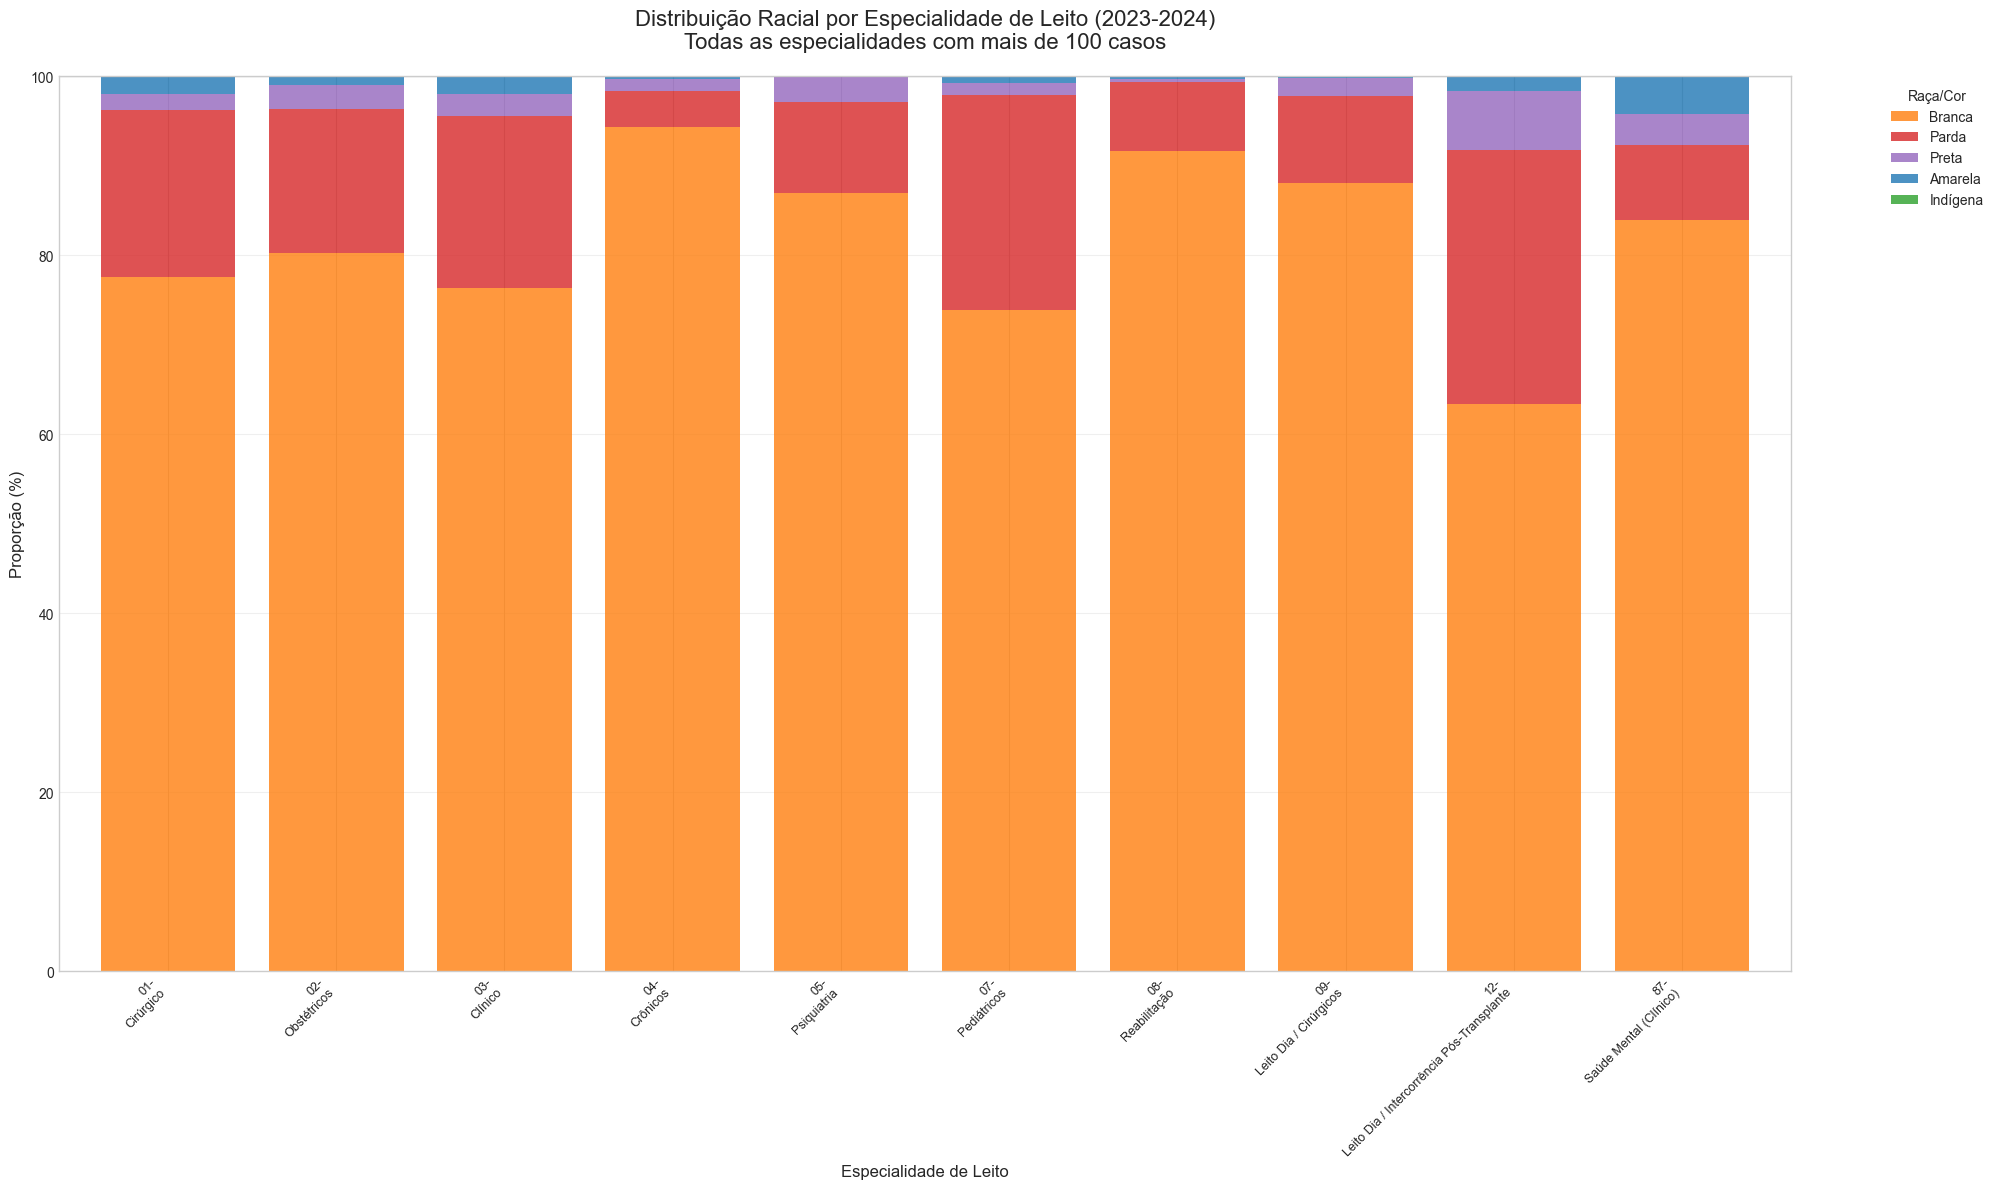

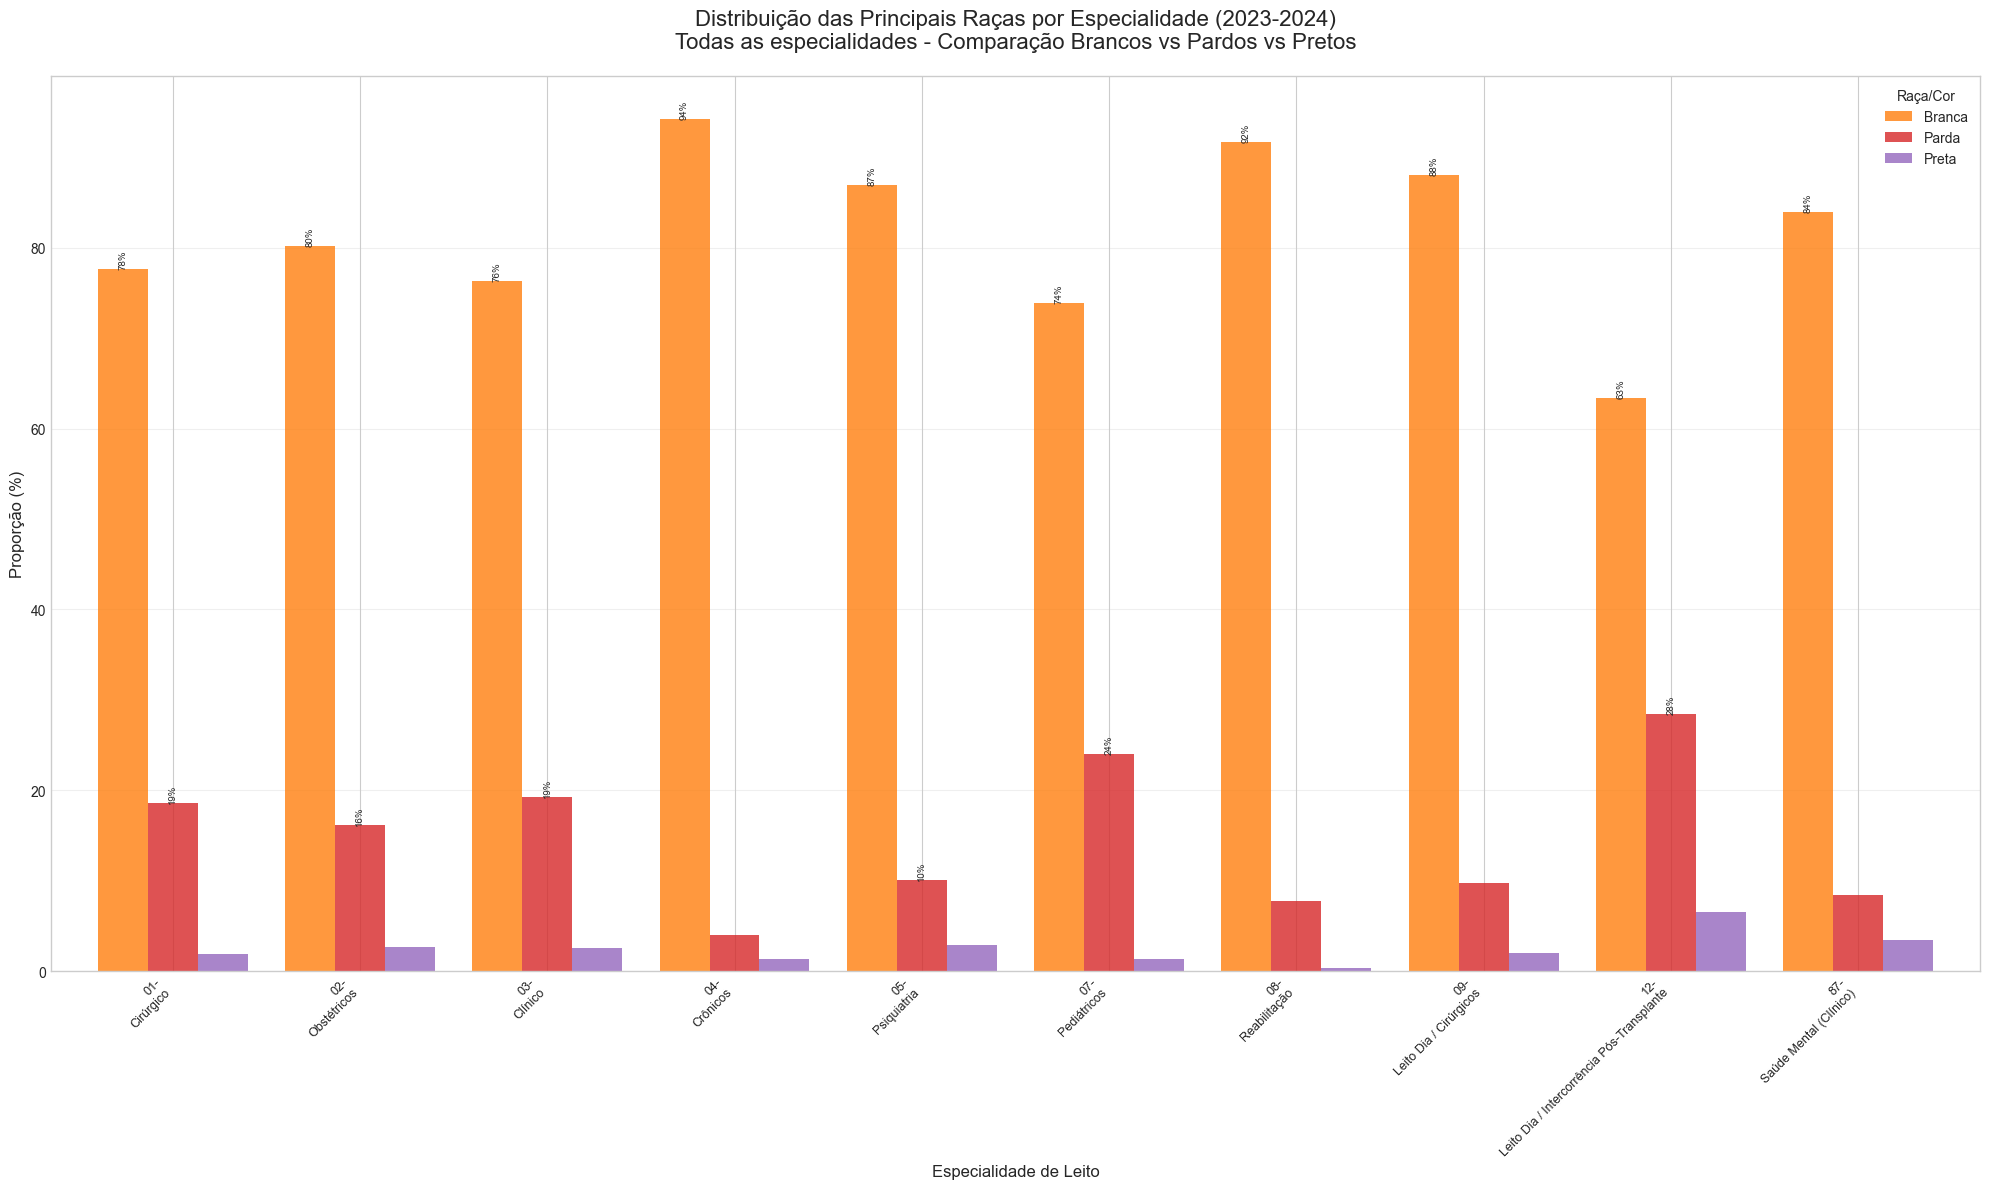


--- RESUMO: Distribuição Racial por Especialidade (2023-2024) ---
Especialidades ordenadas por volume de casos:

Especialidade | Branca | Parda | Preta | Total casos
----------------------------------------------------------------------
01-Cirúrgico                   |  77.6% |  18.6% |   1.8% | 254089
02-Obstétricos                 |  80.2% |  16.1% |   2.7% |  30064
03-Clínico                     |  76.3% |  19.2% |   2.5% | 169777
04-Crônicos                    |  94.3% |   4.0% |   1.4% |   5536
05-Psiquiatria                 |  87.0% |  10.1% |   2.9% |  37254
07-Pediátricos                 |  73.9% |  24.0% |   1.3% |  43156
08-Reabilitação                |  91.6% |   7.7% |   0.3% |    970
09-Leito Dia / Cirúrgicos      |  88.1% |   9.7% |   2.0% |   3837
12-Leito Dia / Intercorrência  |  63.4% |  28.4% |   6.5% |    584
87-Saúde Mental (Clínico)      |  84.0% |   8.4% |   3.4% |   1017

Gráficos salvos com sucesso!
- barras_empilhadas_todas_especialidades_raca.png
- barras_agr

In [8]:
# 4. Gráfico de barras empilhadas CORRIGIDO - Todas as especialidades com cores consistentes
fig, ax = plt.subplots(figsize=(20, 12))

# Define cores fixas para cada raça (mantém consistência)
cores_racas = {
    'Branca': '#ff7f0e',     
    'Parda': '#d62728',      
    'Preta': '#9467bd',     
    'Amarela': '#1f77b4',    
    'Indígena': '#2ca02c'    
}

# Usa todas as especialidades filtradas (não apenas as top 8)
todas_especialidades = proporcoes_filtradas

# Ordena as colunas (raças) para manter consistência
racas_ordenadas = ['Branca', 'Parda', 'Preta', 'Amarela', 'Indígena']
racas_disponiveis = [raca for raca in racas_ordenadas if raca in todas_especialidades.columns]
dados_ordenados = todas_especialidades[racas_disponiveis]

# Cria o gráfico com cores fixas
dados_ordenados.plot(kind='bar', stacked=True, ax=ax, 
                    color=[cores_racas[raca] for raca in racas_disponiveis],
                    alpha=0.8, width=0.8)

ax.set_title('Distribuição Racial por Especialidade de Leito (2023-2024)\nTodas as especialidades com mais de 100 casos', 
             fontsize=16, pad=20)
ax.set_xlabel('Especialidade de Leito', fontsize=12)
ax.set_ylabel('Proporção (%)', fontsize=12)
ax.legend(title='Raça/Cor', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

# Ajusta os rótulos do eixo X para melhor legibilidade
labels_especialidades = []
for esp in todas_especialidades.index:
    # Quebra as linhas longas para melhor visualização
    if len(esp) > 25:
        palavras = esp.split('-', 1)
        if len(palavras) > 1:
            labels_especialidades.append(f"{palavras[0]}-\n{palavras[1]}")
        else:
            # Se não tem hífen, quebra por espaço
            palavras = esp.split(' ')
            meio = len(palavras) // 2
            linha1 = ' '.join(palavras[:meio])
            linha2 = ' '.join(palavras[meio:])
            labels_especialidades.append(f"{linha1}\n{linha2}")
    else:
        labels_especialidades.append(esp.replace('-', '-\n'))

ax.set_xticklabels(labels_especialidades, rotation=45, ha='right', fontsize=9)
ax.grid(True, alpha=0.3, axis='y')
ax.set_ylim(0, 100)

# Adiciona linha de referência em 100%
ax.axhline(y=100, color='black', linestyle='-', alpha=0.5, linewidth=0.8)

plt.tight_layout()
plt.savefig('barras_empilhadas_todas_especialidades_raca.png', dpi=300, bbox_inches='tight')
plt.show()

# 4.1 Gráfico alternativo: Barras agrupadas com todas as especialidades (principais raças)
fig, ax = plt.subplots(figsize=(20, 12))

# Seleciona apenas as 3 principais raças para melhor visualização
racas_principais = ['Branca', 'Parda', 'Preta']
dados_agrupados = todas_especialidades[racas_principais]

# Usa as mesmas cores para consistência
cores_principais = [cores_racas[raca] for raca in racas_principais]
dados_agrupados.plot(kind='bar', ax=ax, width=0.8, alpha=0.8, color=cores_principais)

ax.set_title('Distribuição das Principais Raças por Especialidade (2023-2024)\nTodas as especialidades - Comparação Brancos vs Pardos vs Pretos', 
             fontsize=16, pad=20)
ax.set_xlabel('Especialidade de Leito', fontsize=12)
ax.set_ylabel('Proporção (%)', fontsize=12)
ax.legend(title='Raça/Cor', fontsize=10)

# Usa os mesmos rótulos do gráfico anterior
ax.set_xticklabels(labels_especialidades, rotation=45, ha='right', fontsize=9)
ax.grid(True, alpha=0.3, axis='y')

# Adiciona valores nas barras apenas para valores significativos (>10%)
for container in ax.containers:
    labels = [f'{v:.0f}%' if v > 10 else '' for v in container.datavalues]
    ax.bar_label(container, labels=labels, fontsize=7, rotation=90)

plt.tight_layout()
plt.savefig('barras_agrupadas_todas_especialidades_raca.png', dpi=300, bbox_inches='tight')
plt.show()

# 4.2 Tabela resumo para análise
print("\n--- RESUMO: Distribuição Racial por Especialidade (2023-2024) ---")
print("Especialidades ordenadas por volume de casos:")
print("\nEspecialidade | Branca | Parda | Preta | Total casos")
print("-" * 70)

for esp in todas_especialidades.index:
    total_casos = contingencia.loc[esp].sum()
    branca = todas_especialidades.loc[esp, 'Branca'] if 'Branca' in todas_especialidades.columns else 0
    parda = todas_especialidades.loc[esp, 'Parda'] if 'Parda' in todas_especialidades.columns else 0
    preta = todas_especialidades.loc[esp, 'Preta'] if 'Preta' in todas_especialidades.columns else 0
    
    print(f"{esp[:30]:<30} | {branca:5.1f}% | {parda:5.1f}% | {preta:5.1f}% | {total_casos:6d}")

print(f"\nGráficos salvos com sucesso!")
print(f"- barras_empilhadas_todas_especialidades_raca.png")
print(f"- barras_agrupadas_todas_especialidades_raca.png")

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4476243 entries, 0 to 4476242
Data columns (total 68 columns):
 #   Column                                             Dtype  
---  ------                                             -----  
 0   ano                                                int64  
 1   mes                                                int64  
 2   id_aih                                             int64  
 3   tipo_aih                                           object 
 4   motivo_autorizacao_aih                             object 
 5   sequencial_aih                                     int64  
 6   especialidade_leito                                object 
 7   motivo_saida                                       object 
 8   tipo_uti                                           object 
 9   tipo_uci                                           object 
 10  carater_internacao                                 object 
 11  data_internacao                                   